In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import math
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# tracks information

storms_start_end_path = 'storms_start_end.csv'

storms_start_end = pd.read_csv(storms_start_end_path)

tracks_path_local_mac = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/storms_dates.txt'

tracks = pd.read_csv(tracks_path_local_mac, sep='\t', header=None)
tracks = tracks.drop([0])
# name each column of the tracks dataframe

tracks.columns = ['year', 'monthdayhour', 'month', 'day', 'event','lon', 'lat', 'total_storms', 'long_dates']

In [3]:
lon_list = []
lat_list = []

for i in range(len(storms_start_end)):
    start_date = storms_start_end['start_date'][i]
    end_date = storms_start_end['end_date'][i]

    # Find the index of the start and end dates in the tracks DataFrame
    start_index = tracks.index[(tracks['long_dates'] == start_date) & (tracks['event'] == 'FAUX')].tolist()
    #end_index = tracks.index[(tracks['long_dates'] == end_date) & (tracks['event'].shift(+1) != 'FAUX')].tolist()
    end_index = tracks.index[(tracks['long_dates'] == end_date) & (tracks['event'] == 'FIN')].tolist()

    if start_index and end_index:
        # Extract lon and lat for the storm using the found indices
        lon_i = tracks['lon'].iloc[start_index[0]:end_index[0] + 1].to_numpy()
        lat_i = tracks['lat'].iloc[start_index[0]:end_index[0] + 1].to_numpy()

        # Convert lon and lat values to floats and replace commas with dots
        lonx_i = [float(obj.replace(',', '.')) for obj in lon_i]
        latx_i = [float(obj.replace(',', '.')) for obj in lat_i]

        # Append lon and lat values to the lists
        lon_list.append(lonx_i)
        lat_list.append(latx_i)

# Access the stored values
for j in range(len(lon_list)):
    lon_variable_name = f'lon_{j + 1}'
    lat_variable_name = f'lat_{j + 1}'

    lon_value = lon_list[j]
    lat_value = lat_list[j]

    # Print or use the stored values as needed
    print(lon_variable_name, lon_value)
    print(lat_variable_name, lat_value)
    print("\n")


lon_1 [293.195404, 297.022125, 300.948608, 304.610657, 308.032532, 311.525208, 315.441956, 319.424652, 323.65451, 328.385986, 333.983643, 338.550537, 342.319214, 345.381348, 347.481354, 348.955505, 349.642426, 349.693695, 349.61145, 349.085846, 347.966858, 346.738892, 345.792297, 344.685577, 343.98587, 343.616211, 343.573486, 343.444611, 343.254211, 342.67276, 342.009674, 340.333374, 338.16507, 337.026581, 336.486816, 336.641907, 337.001831, 337.352783, 337.849609, 338.004578, 338.662262, 339.791138, 341.671143, 343.122467, 343.889618, 344.765076, 345.477539, 346.371155, 350.525635, 350.603516, 352.2258, 351.652893, 352.075134, 352.486237, 352.718658, 352.459442, 352.344513, 352.226166, 352.522858, 352.417542, 353.478241, 305.020905]
lat_1 [41.979839, 42.648212, 43.774544, 45.219181, 46.44455, 47.063492, 48.108612, 48.939552, 49.740711, 50.742744, 52.367657, 54.163193, 56.081779, 57.61256, 59.430359, 60.906483, 62.511345, 63.578465, 64.648735, 65.384789, 65.905014, 66.140305, 65.988884

In [9]:
# plotting each tracks
for i in range(len(lon_list)):
    fig, ax = plt.subplots()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.set_xlim(-180, 180)
    ax.set_ylim(0, 90)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Storm {i + 1} - Date: {storms_start_end.iloc[i]["start_date"]}')

    # Initialize an empty scatter plot for the animation
    scatter = ax.scatter([], [], color='red', s=10)

    # Function to update the scatter plot in each frame of the animation
    def update(frame):
        scatter.set_offsets(list(zip(lon_list[i][:frame + 1], lat_list[i][:frame + 1])))

    # Create the animation
    animation = FuncAnimation(fig, update, frames=len(lon_list[i]), interval=200, blit=False)

    # Save each animation as a separate GIF
    animation_file = f'storm_{i + 1}_animation_v2.gif'
    animation.save(animation_file, writer='pillow')
    print(f"Saved animation: {animation_file}")

    # Close the figure to free up resources
    plt.close(fig)

# Show the animations (optional)
plt.show()

Saved animation: storm_1_animation.gif
Saved animation: storm_2_animation.gif
Saved animation: storm_3_animation.gif
Saved animation: storm_4_animation.gif
Saved animation: storm_5_animation.gif
Saved animation: storm_6_animation.gif
Saved animation: storm_7_animation.gif
Saved animation: storm_8_animation.gif
Saved animation: storm_9_animation.gif
Saved animation: storm_10_animation.gif
Saved animation: storm_11_animation.gif
Saved animation: storm_12_animation.gif
Saved animation: storm_13_animation.gif
Saved animation: storm_14_animation.gif
Saved animation: storm_15_animation.gif
Saved animation: storm_16_animation.gif
Saved animation: storm_17_animation.gif
Saved animation: storm_18_animation.gif
Saved animation: storm_19_animation.gif
Saved animation: storm_20_animation.gif
Saved animation: storm_21_animation.gif
Saved animation: storm_22_animation.gif
Saved animation: storm_23_animation.gif
Saved animation: storm_24_animation.gif
Saved animation: storm_25_animation.gif
Saved ani

In [21]:
# convert the longitudes from 0-360 to -180-180
def convert_lon(lon):
    if lon > 180:
        return lon - 360
    else:
        return lon

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2891/3701016281.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2891/3701016281.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2891/3701016281.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imag

KeyboardInterrupt: 

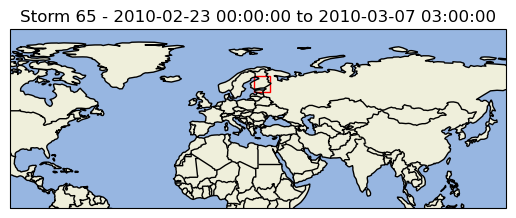

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Function to plot storm for a specific timestep
def plot_storm(ax, lon_east, lon_west, lat_south, lat_north):
    lon_east = convert_lon(lon_east)
    lon_west = convert_lon(lon_west)
    lat_south = np.asarray(lat_south)
    lat_north = np.asarray(lat_north)
    ax.add_patch(patches.Rectangle((lon_west, lat_south), lon_east - lon_west, lat_north - lat_south, linewidth=1, edgecolor='r', facecolor='none'))

# Read storm start and end dates
storm_dates = pd.read_csv("storms_start_end.csv", parse_dates=['start_date', 'end_date'])

# Loop through each storm file
for i in range(1, 97):
    storm_data = pd.read_csv(f"/Users/fabienaugsburger/Documents/GitHub/master-project/tracks_square_storm/tc_irad_tracks/tc_1_hour/tc_irad_{i}_interp.txt")

    # Create a list of storm frames
    storm_frames = []

    # Loop through each timestep of the storm
    for index, row in storm_data.iterrows():
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
        
        # Add basemap features
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)
        
        # Plot storm rectangle
        plot_storm(ax, row['lon_east'], row['lon_west'], row['lat_south'], row['lat_north'])
        
        # Get the corresponding storm start and end date
        storm_start_date = storm_dates.iloc[i-1]['start_date']
        storm_end_date = storm_dates.iloc[i-1]['end_date']
        
        # Set title with storm start and end dates
        ax.set_title(f"Storm {i} - {storm_start_date} to {storm_end_date}")
        
        # Set x and y limits
        ax.set_xlim(-100, 150)
        ax.set_ylim(0, 90)
        
        # Set labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        
        # Save the plot as an image
        plt.savefig(f"all_frames/storm_{i}_frame_{index}.png")
        plt.close()
        
        # Append the image to the list of frames
        storm_frames.append(f"all_frames/storm_{i}_frame_{index}.png")
    
    # Create gif from frames
    with imageio.get_writer(f"test_gif/storm_{i}_animation.gif", mode='I') as writer:
        for frame in storm_frames:
            image = imageio.imread(frame)
            writer.append_data(image)

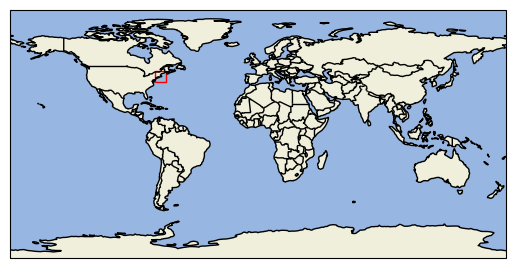

In [44]:
# plot a point on the map

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map with the PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Plot a point on the map
#ax.plot(lon_west, lat_south, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())

# Plot a rectangle on the map
ax.add_patch(patches.Rectangle((convert_lon(lon_west),lat_south),lon_east - lon_west, lat_north - lat_south, linewidth=1, edgecolor='r', facecolor='none'))

# Show the map
plt.show()

In [12]:
# combine all lon_east, lon_west, lat_south, lat_north in one dataframe

storm_data = pd.read_csv(f"/Users/fabienaugsburger/Documents/GitHub/master-project/tracks_square_storm/tc_irad_tracks/tc_1_hour/tc_irad_1_interp.txt")

storm_data = storm_data[['lon_east', 'lon_west', 'lat_south', 'lat_north']]
storm_data['storm'] = 1

for i in range(2, 97):
    storm_data_i = pd.read_csv(f"/Users/fabienaugsburger/Documents/GitHub/master-project/tracks_square_storm/tc_irad_tracks/tc_1_hour/tc_irad_{i}_interp.txt")
    storm_data_i = storm_data_i[['lon_east', 'lon_west', 'lat_south', 'lat_north']]
    storm_data_i['storm'] = i
    storm_data = pd.concat([storm_data, storm_data_i])

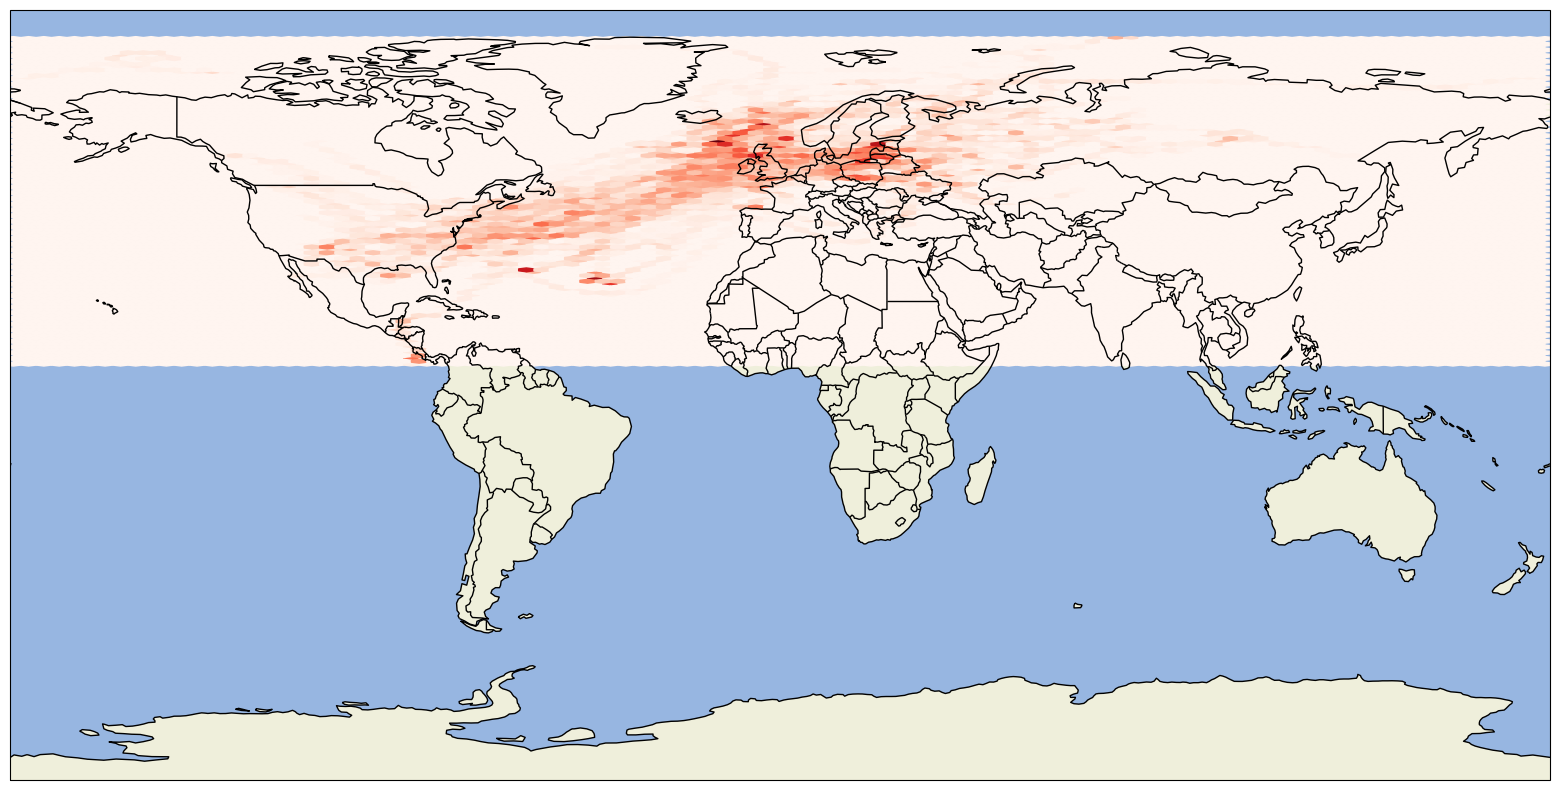

In [17]:
# create a heatmap of the storm tracks

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# save a high resolution image of the heatmap

# Create a map with the PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 10))
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Plot a heatmap of the storm tracks
ax.hexbin(storm_data['lon_east'], storm_data['lat_south'], gridsize=100, cmap='Reds', transform=ccrs.PlateCarree())

# Save the map as an image
plt.savefig("storm_tracks_heatmap.png", dpi=500)

In [ ]:
# create a heatmap of the storms tracks with 8 degrees resolution

# Create a map with the PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 10))
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Plot a heatmap of the storm tracks


In [69]:
'''# check if the coordinates are separated by 8 degrees at each timestep

# Loop through each storm file

for i in range(1, 97):
    storm_data = pd.read_csv(f"/Users/fabienaugsburger/Documents/GitHub/master-project/tracks_square_storm/tc_irad_tracks/tc_1_hour/tc_irad_{i}_interp.txt")
    print(f"Storm {i}")
    for index, row in storm_data.iterrows():
        if index == 0:
            continue
        lon_diff = abs(row['lon_east'] - row['lon_west'])
        lat_diff = abs(row['lat_north'] - row['lat_south'])
        print(f"Time {index} - Lon diff: {lon_diff}, Lat diff: {lat_diff}")

# flag every storm that has a difference in longitude or latitude greater than 8 degrees

# Loop through each storm file

for i in range(1, 97):
    storm_data = pd.read_csv(f"/Users/fabienaugsburger/Documents/GitHub/master-project/tracks_square_storm/tc_irad_tracks/tc_1_hour/tc_irad_{i}_interp.txt")
    flag = False
    for index, row in storm_data.iterrows():
        if index == 0:
            continue
        lon_diff = abs(row['lon_east'] - row['lon_west'])
        lat_diff = abs(row['lat_north'] - row['lat_south'])
        if lon_diff > 8 or lat_diff > 8 or lon_diff < 8 or lat_diff < 8:
            flag = True
            break
    if flag:
        print(f"Storm {i} has a difference in longitude or latitude greater than 8 degrees")
    else:
        print(f"Storm {i} has a difference in longitude and latitude less than 8 degrees")'''

# flag every row of every storm that has a difference in longitude or latitude greater than 8 degrees

# Loop through each storm file

for i in range(1, 97):
    storm_data = pd.read_csv(f"/Users/fabienaugsburger/Documents/GitHub/master-project/tracks_square_storm/tc_irad_tracks/tc_1_hour/tc_irad_{i}_interp.txt")
    flag = False
    for index, row in storm_data.iterrows():
        lon_diff = abs(row['lon_east']) - (row['lon_west']))
        lat_diff = abs(row['lat_north'] - row['lat_south'])
        if lon_diff > 8 or lat_diff > 8 :
            flag = True
            print(f"Storm {i} - Time {index} has a difference in longitude or latitude greater of {abs(row['lon_east'] - row['lon_west'])} and {abs(row['lat_north'] - row['lat_south'])}")
    if not flag:
        print(f"Storm {i} has a difference in longitude and latitude less than 8 degrees")

Storm 1 - Time 50 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 51 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 61 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 64 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 67 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 70 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 86 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 92 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 96 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 98 has a difference in longitude or latitude greater of 8.0 and 8.000000000000007
Storm 1 - Time 101 has a diffe

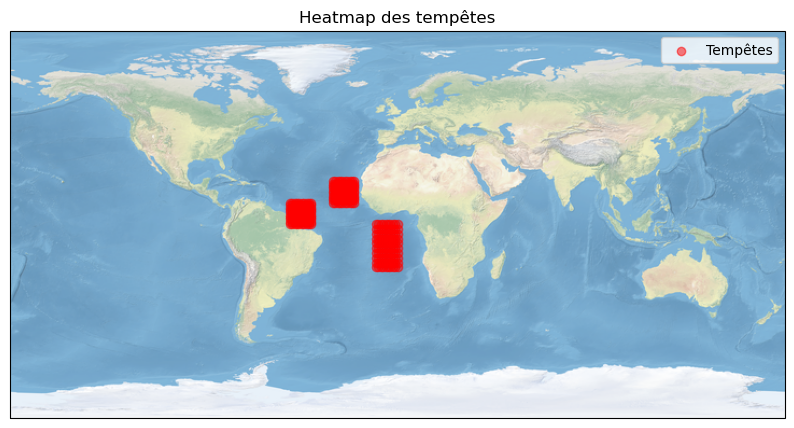

In [9]:
# make a heat map of the storm tracks, the more tracks the more red the color
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# Coordonnées des tempêtes
tempetes = [
    {"sud": 10, "ouest": -30, "nord": 20, "est": -20},
    {"sud": 0, "ouest": -50, "nord": 10, "est": -40},
    {"sud": -20, "ouest": -10, "nord": 0, "est": 0}
]

# Création de la figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Ajout d'une carte de fond
ax.stock_img()

# Boucle sur les tempêtes pour ajouter des points à la heatmap
for tempete in tempetes:
    sud, ouest, nord, est = tempete["sud"], tempete["ouest"], tempete["nord"], tempete["est"]
    lons = np.linspace(ouest, est, 10)
    lats = np.linspace(sud, nord, 10)
    X, Y = np.meshgrid(lons, lats)
    ax.scatter(X, Y, transform=ccrs.PlateCarree(), color='r', marker='o', alpha=0.5)

# Titre et légende
plt.title('Heatmap des tempêtes')
plt.legend(['Tempêtes'])

# Affichage de la carte
plt.show()


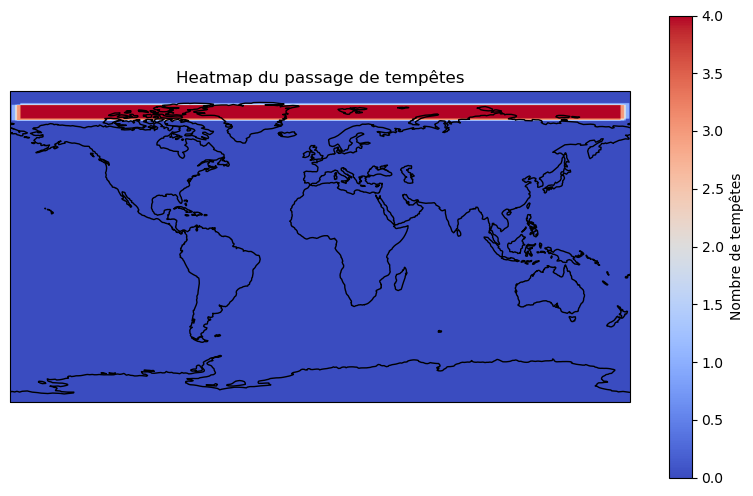

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Coordonnées des tempêtes avec le numéro de la tempête en 5ème colonne

lon_e = storm_data['lon_east']
lon_w = storm_data['lon_west']
lat_s = storm_data['lat_south']
lat_n = storm_data['lat_north']
storm_number = storm_data['storm']


storm_coordinates = []

storm_coordinates = [(lon_e, lon_w, lat_s, lat_n, storm_number) for lon_e, lon_w, lat_s, lat_n, storm_number in zip(lon_e, lon_w, lat_s, lat_n, storm_number)]

storm_coordinates_2 = [
    (330.500987, 322.500987, -50.500987, -42.500987, 1),
    (329, 321, -49, -41, 1),
    (328, 320, -48, -40, 1),
    (310, 302, -20, -12, 2),
    (320, 312, -10, -2, 3)
]

# Fonction pour extraire les coordonnées spatiales des tempêtes
def extract_spatial_coordinates(storm_coordinates):
    return [(coords[0], coords[1], coords[2], coords[3]) for coords in storm_coordinates]

# Fonction pour convertir les longitudes de 0-360 à -180-180
def convert_longitude(lon):
    return lon if lon <= 180 else lon - 360

# Fonction pour calculer la densité des tempêtes dans chaque cellule de la grille
def calculate_density(storm_coordinates, grid_size=1):
    # Extraire les coordonnées spatiales des tempêtes
    spatial_coords = extract_spatial_coordinates(storm_coordinates)
    
    # Créer une grille vide
    lons = np.arange(-180, 180, grid_size)
    lats = np.arange(-90, 90, grid_size)
    density_grid = np.zeros((len(lats), len(lons)))

    # Parcourir les coordonnées des tempêtes
    for coords in spatial_coords:
        # Convertir les longitudes de 0-360 à -180-180
        lon_east = convert_longitude(coords[0])
        lon_west = convert_longitude(coords[1])
        # Trouver les indices des cellules couvertes par la tempête
        lon_start_idx = int((lon_west + 180) // grid_size)
        lon_end_idx = int((lon_east + 180) // grid_size)
        lat_start_idx = int((coords[2] + 90) // grid_size)
        lat_end_idx = int((coords[3] + 90) // grid_size)
        # Incrémenter la densité de ces cellules
        density_grid[lat_start_idx:lat_end_idx+1, lon_start_idx:lon_end_idx+1] += 1

    return density_grid

# Calculer la densité des tempêtes dans chaque cellule de la grille
density_grid = calculate_density(storm_coordinates)

# Créer une copie de la grille pour définir les valeurs où aucune tempête ne passe à NaN
density_grid_no_storm = np.copy(density_grid)
density_grid_no_storm[density_grid_no_storm == 0] = np.nan

# Afficher la heatmap
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Tracer la heatmap
plt.imshow(density_grid, cmap='coolwarm', origin='lower', extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree())
plt.colorbar(label='Nombre de tempêtes')
plt.title('Heatmap du passage de tempêtes')
plt.show()

In [41]:
test = np.asarray(storm_data['lon_east'])

print(convert_lon(test))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# convert to numpy array

storm_data = storm_data.to_numpy()
